In [2]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-19 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART06_scVI'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

suppressMessages(library('reticulate'))
suppressMessages(library('anndata'))
sc <- import("scanpy")
np <- import('numpy')
sce <- import('scanpy.external')

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART05.merged.clean_cbn.srt.rds')
DefaultAssay(srt) <- 'RNA'
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [3]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Convert GEX to ann.data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
gex.srt <- DietSeurat(srt, dimreducs = 'hmn_umap', assay = 'RNA')
SaveH5ad(gex.srt, path = 'integrated/', name = 'PART06.merged.clean_cbn.ann',
         assay = 'RNA', raw_count_only = T, verbose = T)

## Following code is for avoiding "_index" in adata.var bug
adata <- read_h5ad('integrated/PART06.merged.clean_cbn.ann.h5ad')
adata$raw <- NULL
adata$write_h5ad(filename = 'integrated/PART06.merged.clean_cbn.ann.h5ad') ## replace the original
adata$X[1:10, 1:20]
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Raw matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_PMIS_Riley:P1_S001:AAACAGCCAGGTTTGC-1', '2023_PMIS_Riley:P1_S001:AAACATGCACCTGCCT-1', '2023_PMIS_Riley:P1_S001:AAACATGCATCCAGGT-1' ... ]]



                                 
Xkr4          . 1 . . . . . . . .
Gm1992        . . . . . . . . . .
Gm19938       . . . . . . . . . .
Rp1           . . . . . . . . . .
Sox17         . . . . . . 1 . . .
Gm37587       . . . . . . . . . .
Gm37323       . . . . . . . . . .
Mrpl15        . . . . . . . . 1 1
Lypla1        . . . . 1 . . . 2 .
Tcea1         . . . . . . 2 . 1 1
Rgs20         . . . . . . . . . .
Atp6v1h       2 . . . . 1 . . . 2
Oprk1         . . . . . . . . . .
Rb1cc1        . . 1 . . . . 2 . .
4732440D04Rik . . . . . . . . . .
Alkal1        . . . . . . . . . .
St18          . . . . . . . . . .
Pcmtd1        . 3 1 1 3 3 3 . 1 .
Gm26901       . . 1 . . 1 . . 2 1
Gm30414       . . . . . . . . . .


Data matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_PMIS_Riley:P1_S001:AAACAGCCAGGTTTGC-1', '2023_PMIS_Riley:P1_S001:AAACATGCACCTGCCT-1', '2023_PMIS_Riley:P1_S001:AAACATGCATCCAGGT-1' ... ]]



                                 
Xkr4          . 1 . . . . . . . .
Gm1992        . . . . . . . . . .
Gm19938       . . . . . . . . . .
Rp1           . . . . . . . . . .
Sox17         . . . . . . 1 . . .
Gm37587       . . . . . . . . . .
Gm37323       . . . . . . . . . .
Mrpl15        . . . . . . . . 1 1
Lypla1        . . . . 1 . . . 2 .
Tcea1         . . . . . . 2 . 1 1
Rgs20         . . . . . . . . . .
Atp6v1h       2 . . . . 1 . . . 2
Oprk1         . . . . . . . . . .
Rb1cc1        . . 1 . . . . 2 . .
4732440D04Rik . . . . . . . . . .
Alkal1        . . . . . . . . . .
St18          . . . . . . . . . .
Pcmtd1        . 3 1 1 3 3 3 . 1 .
Gm26901       . . 1 . . 1 . . 2 1
Gm30414       . . . . . . . . . .


Scaled Data matrix:

No scaled data slot

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for hmn_umap

No loadings for hmn_umap

No projected loadings for hmn_umap

No standard deviations for hmn_umap

No JackStraw data for hmn_umap

Validating h5Seurat file

Adding data from RNA as X

Transfering meta.features to var

Adding counts from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for hmn_umap



None

  [[ suppressing 20 column names 'Xkr4', 'Gm1992', 'Gm19938' ... ]]



10 x 20 sparse Matrix of class "dgTMatrix"
                                                                              
2023_PMIS_Riley:P1_S001:AAACAGCCAGGTTTGC-1 . . . . . . . . . . . 2 . . . . . .
2023_PMIS_Riley:P1_S001:AAACATGCACCTGCCT-1 1 . . . . . . . . . . . . . . . . 3
2023_PMIS_Riley:P1_S001:AAACATGCATCCAGGT-1 . . . . . . . . . . . . . 1 . . . 1
2023_PMIS_Riley:P1_S001:AAACATGCATGTTGCA-1 . . . . . . . . . . . . . . . . . 1
2023_PMIS_Riley:P1_S001:AAACATGCATTATGGT-1 . . . . . . . . 1 . . . . . . . . 3
2023_PMIS_Riley:P1_S001:AAACCGAAGAGAGCCG-1 . . . . . . . . . . . 1 . . . . . 3
2023_PMIS_Riley:P1_S001:AAACCGAAGTTGGATC-1 . . . . 1 . . . . 2 . . . . . . . 3
2023_PMIS_Riley:P1_S001:AAACCGCGTCCGCTGT-1 . . . . . . . . . . . . . 2 . . . .
2023_PMIS_Riley:P1_S001:AAACCGCGTGAGGTAG-1 . . . . . . . 1 2 1 . . . . . . . 1
2023_PMIS_Riley:P1_S001:AAACGCGCAAGGTGGC-1 . . . . . . . 1 . 1 . 2 . . . . . .
                                              
2023_PMIS_Riley:P1_S001:AAACAGCCAGGTTTGC-

In [4]:
getwd()

[1] "/Volumes/shire/project/2023_neoc3ko_rli/rdata/mouse_v0"

In [4]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Follow jupyter notebook PART06 and PART07  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----

In [5]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Re-embed based on scVI latent  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
# adata <- read_h5ad('integrated/PART07.scanvi_integration.h5ad') ## didn't work due to bug

# scvi_mtx <- adata$layers$get('scvi_normalized')
# dim(scvi_mtx)
# H(scvi_mtx)
# O(colnames(scvi_mtx), rownames(srt))
# O(str_remove(rownames(scvi_mtx), pattern = '-0$'), Cells(srt))
# rownames(scvi_mtx) <- str_remove(rownames(scvi_mtx), pattern = '-0$')
# identical(rownames(scvi_mtx), Cells(srt))
# srt[['SCVI']] <- CreateAssayObject(data = t(scvi_mtx), check.matrix = T)

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Re-embed based on scVI latent (bug work around)  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----

## Add scVI result
obsm2 <- read.csv(file = 'integrated/STEP06.scanvi_integration.csvs/obsm.csv', sep = ',', header = T)
obs2 <- read.csv(file = 'integrated/STEP06.scanvi_integration.csvs/obs.csv', sep = ',', header = T)
rownames(obsm2) <- str_remove(obs2$X, pattern = '-0$')
O(Cells(srt), rownames(obsm2))
identical(Cells(srt), rownames(obsm2))
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

x      y common 
101635 101635 101635

[1] TRUE

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



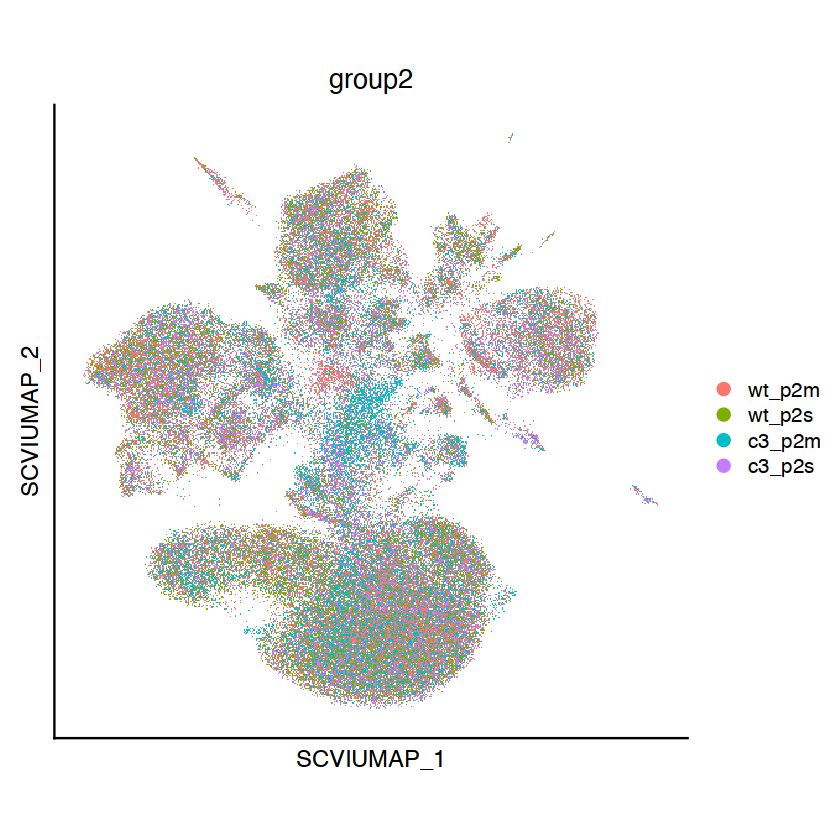

In [6]:
## Save reduced dimensions from scVI (no ref data)
srt@reductions$scVI_umap <- srt@reductions$umap
srt@reductions$scVI_umap@cell.embeddings <- as.matrix(obsm2[, paste0('X_scVIumap', 1:2)])
colnames(srt@reductions$scVI_umap@cell.embeddings) <- c('SCVIUMAP_1', 'SCVIUMAP_2')
srt@reductions$scVI_umap@assay.used <- 'RNA'
srt@reductions$scVI_umap@key <- 'SCVIUMAP_'
DimPlot2(srt, reduction = 'scVI_umap', group.by = 'group2')

srt@reductions$scVI <- srt@reductions$umap
srt@reductions$scVI@cell.embeddings <- as.matrix(obsm2[, paste0('X_scVI', 1:50)])
rownames(srt@reductions$scVI@cell.embeddings) <- Cells(srt)
colnames(srt@reductions$scVI@cell.embeddings) <- paste0('SCVI_', 1:50)
srt@reductions$scVI@assay.used <- 'RNA'
srt@reductions$scVI@key <- 'SCVI_'

## Save metadata

srt$Cluster_leiden_res1.5 <- obs2$Cluster_leiden_res1.5
srt$Cluster_leiden_res1.0 <- obs2$Cluster_leiden_res1.0
srt$Cluster_leiden_res0.8 <- obs2$Cluster_leiden_res0.8
srt$Cluster_leiden_res0.5 <- obs2$Cluster_leiden_res0.5
srt$Cluster_leiden_res0.2 <- obs2$Cluster_leiden_res0.2
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [7]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Check meta and dimensions  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
plist <- list()

dr <- c('scVI_umap')
plist[[1]] <- DimPlot2(srt, group.by = 'group1', cols = mycol_10, reduction = dr)
plist[[2]] <- DimPlot2(srt, group.by = 'Doublet_SC', cols = mycol_10, reduction = dr)


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [8]:
p1 <- wrap_plots(plist[[1]], ncol = 2)
p2 <- wrap_plots(plist[[2]], ncol = 2)
PlotPDF('01.umap.by_sample_by_predicted_celltype', 20, 20)
p1
p2
dev.off()

pdf 
  2

In [13]:
colMaxs(as.matrix(obs2[, 30:34]))
plist <- list()

dr <- c('scVI_umap')
plist[[1]] <- DimPlot2(srt, group.by = 'Cluster_leiden_res0.2', cols = mycol_20, reduction = dr,
                                    label = T, repel = T)
plist[[2]] <- DimPlot2(srt, group.by = 'Cluster_leiden_res0.5', cols = mycol_20, reduction = dr,
                                    label = T, repel = T)
plist[[3]] <- DimPlot2(srt, group.by = 'Cluster_leiden_res0.8', cols = mycol_30, reduction = dr,
                                    label = T, repel = T)
plist[[4]] <- DimPlot2(srt, group.by = 'Cluster_leiden_res1.0', cols = mycol_30, reduction = dr,
                                    label = T, repel = T)
plist[[5]] <- DimPlot2(srt, group.by = 'Cluster_leiden_res1.5', cols = mycol_40, reduction = dr,
                                    label = T, repel = T)

p1 <- wrap_plots(plist[[1]], ncol = 3)
p2 <- wrap_plots(plist[[2]], ncol = 3)
p3 <- wrap_plots(plist[[3]], ncol = 3)
PlotPDF('02.umap.leiden', 22, 16)
p1
p2
p3
dev.off()

[1] 36 25 22 16 11

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



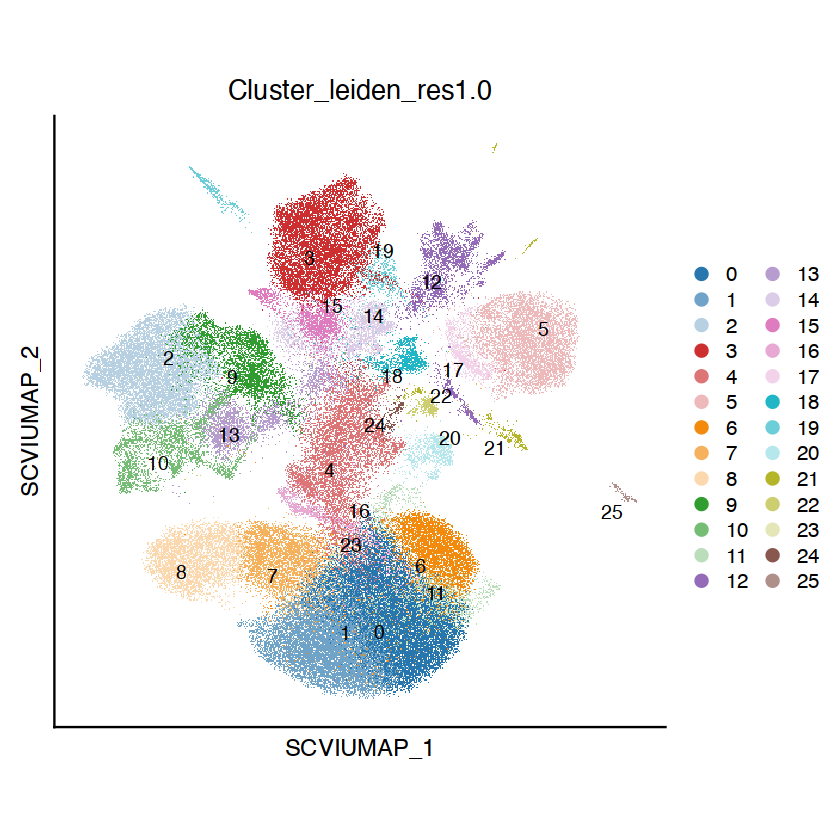

In [14]:
DimPlot2(srt, group.by = 'Cluster_leiden_res1.0', cols = mycol_30, reduction = dr,
                                    label = T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



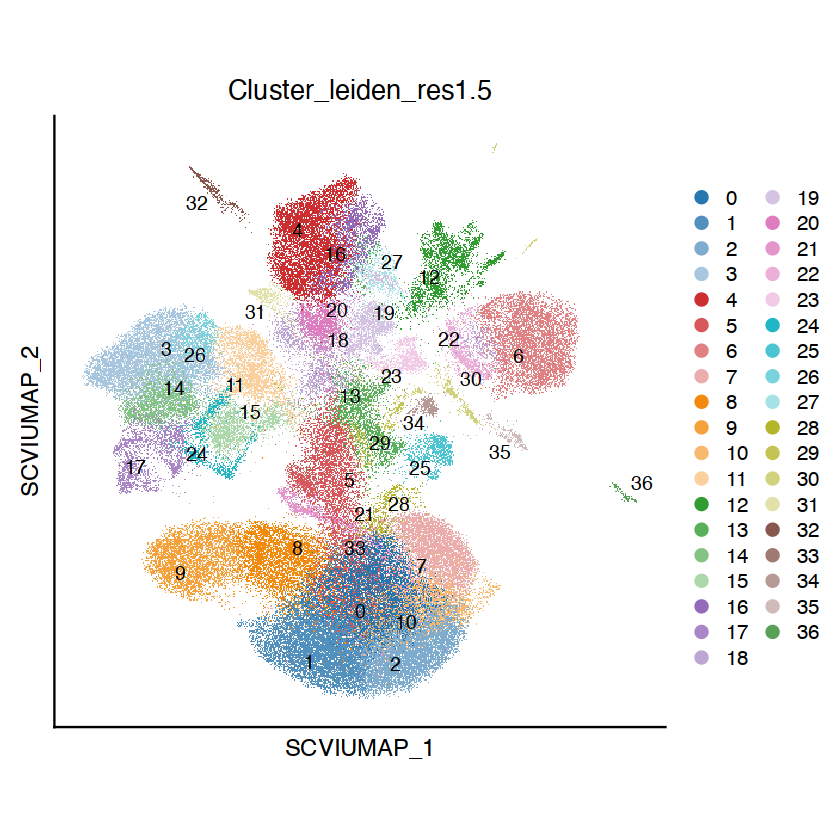

In [17]:
DimPlot2(srt, group.by = 'Cluster_leiden_res1.5', cols = mycol_40, reduction = dr,
                                    label = T, repel = T)

In [18]:
srt <- DietSeurat(srt, assays = names(srt@assays),
                  dimreducs = c('scVI_umap', 'scVI'))
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [19]:
saveRDS(srt, 'integrated/PART06.scvi_integration_clustered.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~